# [正则化](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html)

## 0. 加载相关模块

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from ml_visualization import plot_class_regions_for_classifier

## 1. 加载数据集

In [2]:
# 加载数据集
fruits_df = pd.read_table('fruit_data_with_colors.txt')

### 1.1 处理数据

In [3]:
X = fruits_df[['width', 'height']]
y = fruits_df['fruit_label'].copy()

# 将不是apple的标签设为0
# 二分类问题
y[y != 1] = 0
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

## 2. 建立模型

C=0.1，准确率：0.667


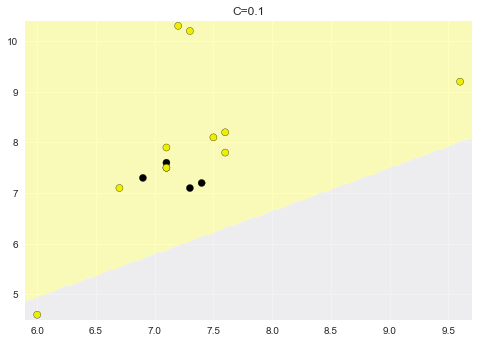

C=1，准确率：0.600


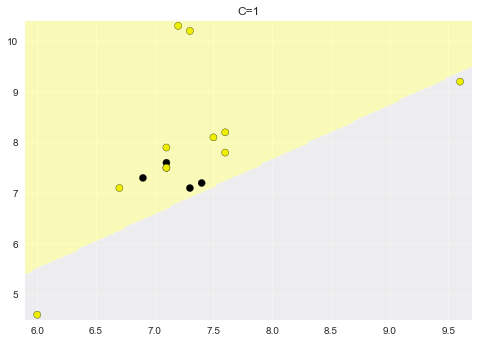

C=100，准确率：0.733


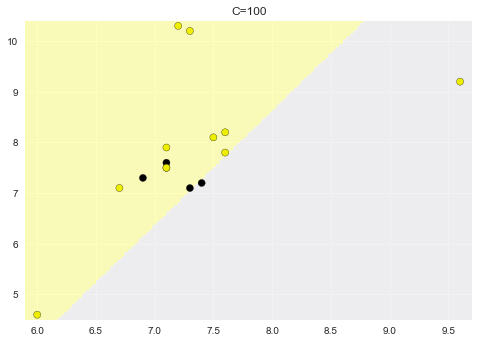

In [4]:
# 设置不同的C值
c_values = [0.1, 1, 100]

for c_value in c_values:
    # 建立模型
    lr_model = LogisticRegression(C=c_value)

    # 训练模型
    lr_model.fit(X_train, y_train)

    # 验证模型
    y_pred = lr_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print('C={}，准确率：{:.3f}'.format(c_value, acc))
    
    # 可视化
    plot_class_regions_for_classifier(lr_model, X_test.values, y_test.values, title='C={}'.format(c_value))